In [ ]:
# read in data and check data sanity 
import collections 
data = pd.read("./data.csv")

print( data.describe()) 


In [ ]:
# are there any nulls? 
# if there are a few, impute it up with some value 
print( collections.Counter(data["column_x"].values.tolist() )
collections["column_x"] = collections["column_x"].apply(lambda x: VALUE if x != x else x )

In [ ]:
# train, test split 
X = data[features]
y = data[labels]

from sklearn.cross_validation import StratifiedShuffleSplit

stratSplit = StratifiedShuffleSplit(y, 1, test_size = 0.1, random_state = 42)
for train_idx, test_idx in stratSplit:
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


In [ ]:
# fit model 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train)

In [ ]:
# look at confusion matrix 
from sklearn.metrics import confusion_matrix 
y_pred = rf.predict(X_test)
print(confusion_matrix(y_pred, y_test))

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_pred, y_test))

In [ ]:
import numpy as np
num_of_features = 10
names = X_train.columns.values.tolist()
std = np.std([tree.feature_importances_ for tree in logitModel.estimators_], axis = 0)

features = sorted(zip(map(lambda x: round(x,4), logitModel.feature_importances_), names, std), reverse = True)[:num_of_features]

names_sorted = [ x[1] for x in features ]
importance_sorted = [ x[0] for x in features ]
std_sorted = [x[2] for x in features]

print("Feature importance ranking:")
for i in range(num_of_features):
    print("%d. features %s %f %f\n" % (i+1, names_sorted[i], importance_sorted[i], std_sorted[i]))


NameError: name 'importance_sorted' is not defined

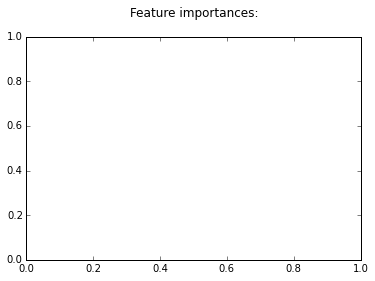

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Feature importances:\n")
num_of_features = 10
plt.bar(range(num_of_features), importance_sorted,
        color = 'r', yerr= std_sorted, align = "center" )

plt.xticks(range(num_of_features), names, rotation=45  )

plt.xlim([-1, num_of_features])
plt.show()

In [ ]:
# other 
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()